In [1]:
# explore the effect of degree on accuracy for the polynominal features transform
from pandas import read_csv
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
# get the data set
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=0)
    data = dataset.values
    # separate into input and output column
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

In [3]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for d in range(1, 5):
        # define pipeline
        trans = PolynomialFeatures(degree=d)
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

In [4]:
# evaluate a given model using cross_validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [5]:
# define dataset
X, y = get_dataset('Sonar.csv')
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)
>4 0.795 (0.079)


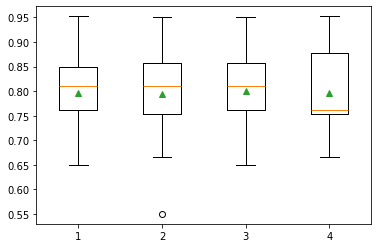

In [6]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()